<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

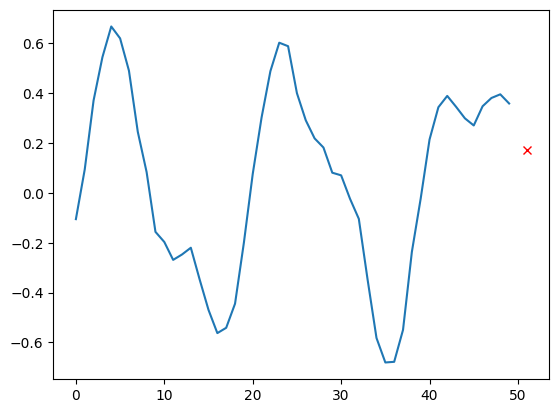

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 7s 11ms/step - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 2/5
219/219 [==============================] - 1s 5ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 3/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 4/5
219/219 [==============================] - 1s 5ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5/5
219/219 [==============================] - 1s 6ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

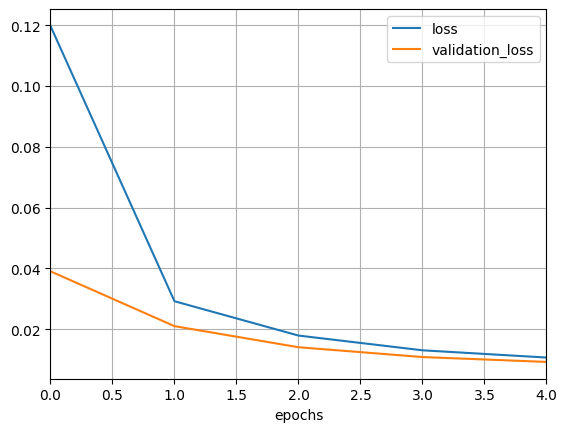

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.00940773170441389
Test MSE:  0.00940773170441389


In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 13s 53ms/step - loss: 0.2831 - mean_squared_error: 0.2831 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 2/5
219/219 [==============================] - 14s 65ms/step - loss: 0.1601 - mean_squared_error: 0.1601 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 3/5
219/219 [==============================] - 7s 32ms/step - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 4/5
219/219 [==============================] - 9s 39ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 5/5
219/219 [==============================] - 9s 40ms/step - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0345 - val_mean_squared_error: 0.0345


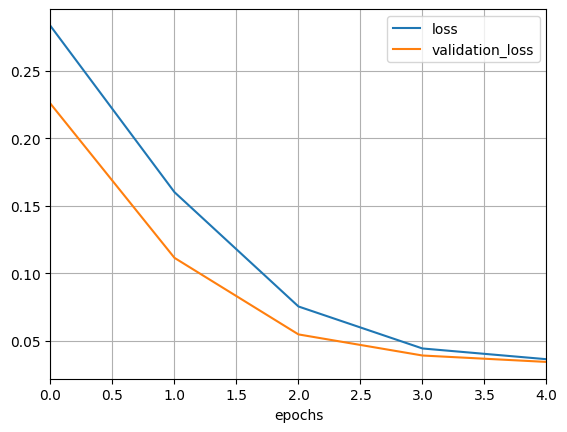

In [17]:
plot_function(history_simple_rnn)

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 35s 141ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 2/5
219/219 [==============================] - 31s 142ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/5
219/219 [==============================] - 30s 137ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/5
219/219 [==============================] - 31s 140ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/5
219/219 [==============================] - 30s 137ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003497038735076785
Test MSE:  0.003497038735076785


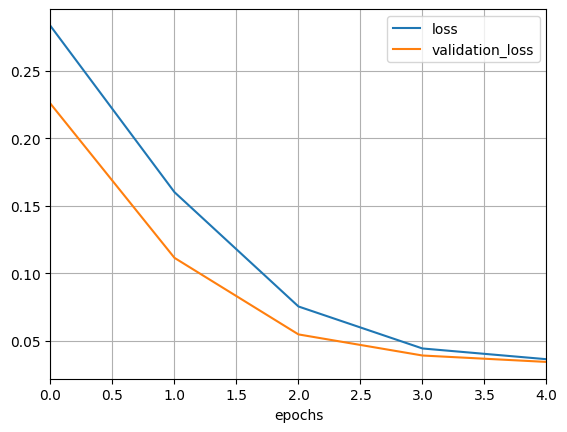

In [22]:
plot_function(history_simple_rnn)

# ***Exercise 2-The movie review***

In [23]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [24]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 0s 0us/step


In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
max(list(word_index.items()))

('\uf0b7', 24008)

In [30]:
X_train.shape

(25000, 150)

In [31]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    #keras.layers.LSTM(128, return_sequences=True),
    #keras.layers.LSTM(128), LSTM can also be used to speed up the process
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [32]:
optimizer = Adam(learning_rate = 0.001)

In [33]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 41s 58ms/step - loss: 0.6267 - accuracy: 0.6083 - val_loss: 0.4730 - val_accuracy: 0.7778
Epoch 2/5
625/625 [==============================] - 16s 25ms/step - loss: 0.4015 - accuracy: 0.8176 - val_loss: 0.3785 - val_accuracy: 0.8372
Epoch 3/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3506 - accuracy: 0.8456 - val_loss: 0.3821 - val_accuracy: 0.8306
Epoch 4/5
625/625 [==============================] - 12s 20ms/step - loss: 0.3401 - accuracy: 0.8498 - val_loss: 0.3914 - val_accuracy: 0.8264
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3325 - accuracy: 0.8543 - val_loss: 0.3932 - val_accuracy: 0.8226


In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.37648651003837585
Test accuracy:  82.8279972076416 %
